In [1]:
import tensorflow 
import keras
tensorflow.__version__

'2.6.2'

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from sklearn.utils import resample

data = pd.read_csv("data/data_labels_mainData.csv")
data.head(30)

,InstanceID,patientID,ImageName,cellTypeName,cellType,isCancerous
0,22405,1,22405.png,fibroblast,0,0
1,22406,1,22406.png,fibroblast,0,0
2,22407,1,22407.png,fibroblast,0,0
3,22408,1,22408.png,fibroblast,0,0
4,22409,1,22409.png,fibroblast,0,0
5,22410,1,22410.png,fibroblast,0,0
6,22411,1,22411.png,fibroblast,0,0
7,22412,1,22412.png,fibroblast,0,0
8,22413,1,22413.png,fibroblast,0,0
9,22414,1,22414.png,fibroblast,0,0


Now that we have loaded in the data files and imported some methods it's time for some EDA

In [3]:
data.nunique()

InstanceID      9896
patientID         60
ImageName       9896
cellTypeName       4
cellType           4
isCancerous        2
dtype: int64

In [4]:
data.drop("InstanceID", axis=1, inplace = True)
data.head()

,patientID,ImageName,cellTypeName,cellType,isCancerous
0,1,22405.png,fibroblast,0,0
1,1,22406.png,fibroblast,0,0
2,1,22407.png,fibroblast,0,0
3,1,22408.png,fibroblast,0,0
4,1,22409.png,fibroblast,0,0


We can see that cellTypeName is the same as cellType 
- {0:fibroblast}
- {1:inflammatory} 
- {2:epithelial} 
- {3:others}


 so the cellTypeName class is not usefull to us so we can safely drop it

In [5]:
data.drop("cellTypeName", axis=1, inplace = True)

data.head()

,patientID,ImageName,cellType,isCancerous
0,1,22405.png,0,0
1,1,22406.png,0,0
2,1,22407.png,0,0
3,1,22408.png,0,0
4,1,22409.png,0,0


Now lets see a couple of different tables to see when a cell is cancerous 

In [6]:
filtered_data0 = data[data["cellType"] == 0]
filtered_data1 = data[data["cellType"] == 1]
filtered_data2 = data[data["cellType"] == 2]
filtered_data3 = data[data["cellType"] == 3]

In [7]:
cancerous_freq0 = filtered_data0.groupby("isCancerous").size()
cancerous_freq1 = filtered_data1.groupby("isCancerous").size()
cancerous_freq2 = filtered_data2.groupby("isCancerous").size()
cancerous_freq3 = filtered_data3.groupby("isCancerous").size()


print(f"""
Cell type of 0 has this many cancerous cells {cancerous_freq0} with a total of {filtered_data0.count()}

Cell type of 1 has this many cancerous cells {cancerous_freq1} with a total of {filtered_data1.count()}

Cell type of 2 has this many cancerous cells {cancerous_freq2} with a total of {filtered_data2.count()}

Cell type of 3 has this many cancerous cells {cancerous_freq3} with a total of {filtered_data3.count()}
""")


Cell type of 0 has this many cancerous cells isCancerous
0    1888
dtype: int64 with a total of patientID      1888
ImageName      1888
cellType       1888
isCancerous    1888
dtype: int64

Cell type of 1 has this many cancerous cells isCancerous
0    2543
dtype: int64 with a total of patientID      2543
ImageName      2543
cellType       2543
isCancerous    2543
dtype: int64

Cell type of 2 has this many cancerous cells isCancerous
1    4079
dtype: int64 with a total of patientID      4079
ImageName      4079
cellType       4079
isCancerous    4079
dtype: int64

Cell type of 3 has this many cancerous cells isCancerous
0    1386
dtype: int64 with a total of patientID      1386
ImageName      1386
cellType       1386
isCancerous    1386
dtype: int64



After understanding the data we can see that cell type 2 is the cancerous cell and that all cell types of 2 will be cancerous and that any other type of cell will not be cancerous so now lets see how much testing data we have for both types of cells to see if anything is unbalanced.

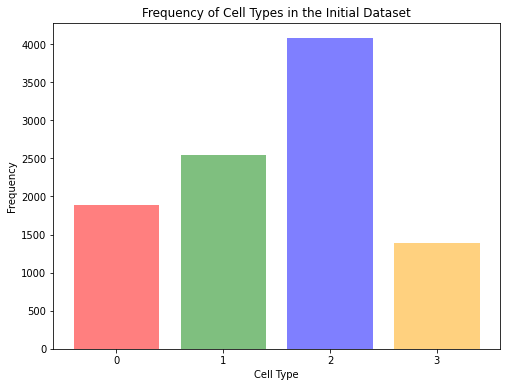

In [8]:
cell_type_counts = data['cellType'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(cell_type_counts.index, cell_type_counts.values, color=['blue', 'green', 'red', 'orange'], alpha=0.5)
plt.xlabel('Cell Type')
plt.xticks([0, 1, 2, 3])
plt.ylabel('Frequency')
plt.title('Frequency of Cell Types in the Initial Dataset')


plt.show()


In [9]:
uncancerous_cells = data[data["cellType"].isin([0, 1, 3])]
cancerous_cells = filtered_data2


print(f"""
count of uncancerous cells = {uncancerous_cells["ImageName"].count()}
count of cancerous cells = {cancerous_cells["ImageName"].count()}
""")


count of uncancerous cells = 5817
count of cancerous cells = 4079



there seems to be a slight imbalance in the binary classfication of the two cells, so lets see if adding the extra data may result in a better and more balanced spread among the dataset

In [ ]:
extra_data = pd.read_csv("data/data_labels_extraData.csv")
extra_data.head(30)

,InstanceID,patientID,ImageName,isCancerous
0,12681,61,12681.png,0
1,12682,61,12682.png,0
2,12683,61,12683.png,0
3,12684,61,12684.png,0
4,12685,61,12685.png,0
5,12686,61,12686.png,0
6,12687,61,12687.png,0
7,12688,61,12688.png,0
8,12689,61,12689.png,0
9,12690,61,12690.png,0


In [11]:
print(extra_data[extra_data["isCancerous"] == 1].count())

print()

print(extra_data[extra_data["isCancerous"] == 0].count())

InstanceID     2990
patientID      2990
ImageName      2990
isCancerous    2990
dtype: int64

InstanceID     7394
patientID      7394
ImageName      7394
isCancerous    7394
dtype: int64


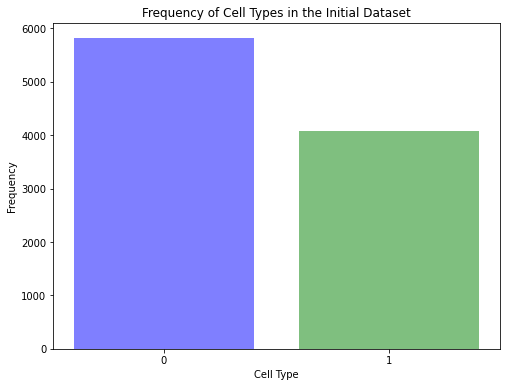

In [12]:
cell_type_counts = data['isCancerous'].value_counts()

plt.figure(figsize=(8, 6))
plt.bar(cell_type_counts.index, cell_type_counts.values, color=['blue', 'green'], alpha=0.5)
plt.xlabel('Cell Type')
plt.xticks([0, 1])
plt.ylabel('Frequency')
plt.title('Frequency of Cell Types in the Initial Dataset')

plt.show()

#Task 1: classifying cells into four types

After some thought and deliberation to the extra dataset provided. I have reviewed the initial dataset and it is clear that only cell types of type 2 are cancerous, therefore, for this image classification problem I should be able to add in all the cancerous cells from the extra data and assume that their cell type is 2. However, the same cannot be said for the other non-cancerous cells because they could fall into cell types of (0,1,3) which if assumed would be bad assumptions.


After creating a mixed set of data with all of the original data and then all of the extra cancerous data provided the frequency of the cell types would be as follows:

- 0 - 1888
- 1 - 2543
- 2 - 7069
- 3 - 1386

Doing this would cause an imbalance within the training dataset, hense, data agumentation should be applied. This is a technique used to generate additional trainig samples. It involves applying image transformations to exisitng images, such as rotation, scaling, flipping, or adjusting brightness and contract. The goal is to create slightly altered images that can help the model generalise better to unseen data.

Here is the high level overview of this appraoch.

1. Make a new data which combines all instances of cancerous cells in the extra dataset and all of the original data.
2. Split the combined dataset into trainig, validation and test sets
3. create an "ImageGenerator" instance with augmentations
4. Apply the augmentations only to the training dataset becausae the validation and testing dataset should be untouched
5. train my model using the training data

This approach helps with a more balanced model, which will probably lead to better model performance when predicitng cell types.


#Task 2: identifying weather a cell is cancerous or not
task two is fairly stright forward to implement the extra tarining data provided since the only focus is on weather a cell is cancerous or not so I can make a combined dataset of both the data values drop all the rows except for the image and the binary classfication of isCancerous and apply data agumentation so we have an even amount of cancerous and not-cancerous cells and then make the model using that 


In [13]:
extra_data_task1 = extra_data[extra_data['isCancerous'] == 1]
extra_data_task1 = extra_data_task1.assign(cellType=2)

In [14]:
combined_data_task1 = pd.concat([data, extra_data_task1], axis=0, ignore_index=True)
combined_data_task1.head()

,patientID,ImageName,cellType,isCancerous,InstanceID
0,1,22405.png,0,0,NaN
1,1,22406.png,0,0,NaN
2,1,22407.png,0,0,NaN
3,1,22408.png,0,0,NaN
4,1,22409.png,0,0,NaN


In [15]:
combined_data_task1.drop([ "isCancerous", "InstanceID"], axis=1, inplace=True)
print(f"number of null values in the cellType: {(combined_data_task1['cellType'].isnull().sum())}")
print(combined_data_task1.value_counts('cellType'))
print(f"this is how many pepole's cells we have for validation: {combined_data_task1['patientID'].nunique()}")
combined_data_task1.head()

number of null values in the cellType: 0
cellType
2    7069
1    2543
0    1888
3    1386
dtype: int64
this is how many pepole's cells we have for validation: 77


,patientID,ImageName,cellType
0,1,22405.png,0
1,1,22406.png,0
2,1,22407.png,0
3,1,22408.png,0
4,1,22409.png,0


In [16]:
extra_data_task2 = extra_data
combined_data_task2 = pd.concat([data, extra_data_task2], axis=0, ignore_index=True)
combined_data_task2.drop(["cellType", "InstanceID"], axis=1, inplace=True)
print(f"number of null values in isCancerous: {combined_data_task2['isCancerous'].isnull().sum()}")
print(combined_data_task2.value_counts('isCancerous'))
print(f"this is how many pepole's cells we have for validation: {combined_data_task2['patientID'].nunique()}")
combined_data_task2.head()

number of null values in isCancerous: 0
isCancerous
0    13211
1     7069
dtype: int64
this is how many pepole's cells we have for validation: 98


,patientID,ImageName,isCancerous
0,1,22405.png,0
1,1,22406.png,0
2,1,22407.png,0
3,1,22408.png,0
4,1,22409.png,0


Now that we have our datasets almost completed, we need a way to ensure while spliting the data we do not have data leaks from the same patients i.e. the same patients cells being present in multiple datasets for example patient 1's cells being in the train and val data. in order to avoid this we need to group the data by patientID's first and then perform the split in regards to that. Here is a function that does that. It splits the given data to into three sets with the splits being. Train = 60%, Validation = 20% and Test = 20%

In [17]:
def train_val_test_split_grouped(df, patientID, targetCol, train_ratio=0.6, val_ratio=0.2, seed=25):
    np.random.seed(seed)
    unique_groups = df[patientID].unique()
    np.random.shuffle(unique_groups)

    train_idx = int(train_ratio * len(unique_groups))
    val_idx = int((train_ratio + val_ratio) * len(unique_groups))

    train_groups = unique_groups[:train_idx]
    val_groups = unique_groups[train_idx:val_idx]
    test_groups = unique_groups[val_idx:]

    train_data = df[df[patientID].isin(train_groups)].copy()
    val_data = df[df[patientID].isin(val_groups)].copy()
    test_data = df[df[patientID].isin(test_groups)].copy()

    label_counts = df[targetCol].value_counts(normalize=True)
    train_counts = train_data[targetCol].value_counts(normalize=True)
    val_counts = val_data[targetCol].value_counts(normalize=True)
    test_counts = test_data[targetCol].value_counts(normalize=True)

    print("Label distribution:\n", label_counts)
    print("Train distribution:\n", train_counts)
    print("Validation distribution:\n", val_counts)
    print("Test distribution:\n", test_counts)

    train_data.drop(patientID, axis=1, inplace=True)
    val_data.drop(patientID, axis=1, inplace=True)
    test_data.drop(patientID, axis=1, inplace=True)


    return train_data, val_data, test_data

In [18]:
task1_train, task1_val, task1_test = train_val_test_split_grouped(combined_data_task1, "patientID", "cellType")

Label distribution:
 2    0.548580
1    0.197346
0    0.146516
3    0.107559
Name: cellType, dtype: float64
Train distribution:
 2    0.551853
1    0.192003
0    0.138137
3    0.118006
Name: cellType, dtype: float64
Validation distribution:
 2    0.641947
0    0.172267
1    0.132870
3    0.052916
Name: cellType, dtype: float64
Test distribution:
 2    0.462831
1    0.263736
0    0.144473
3    0.128959
Name: cellType, dtype: float64


In [19]:
task2_train, task2_val, task2_test = train_val_test_split_grouped(combined_data_task2, "patientID", "isCancerous")

Label distribution:
 0    0.65143
1    0.34857
Name: isCancerous, dtype: float64
Train distribution:
 0    0.61135
1    0.38865
Name: isCancerous, dtype: float64
Validation distribution:
 0    0.646357
1    0.353643
Name: isCancerous, dtype: float64
Test distribution:
 0    0.78535
1    0.21465
Name: isCancerous, dtype: float64


now that we have all the datasets made it's time to make the model. I will be training and then doing hyperparameter tuning on Task 1 first. but we aren't done yet because now I need to make agumentations on the data in the train sets onmly to match the frequency of each cell type.

In [20]:
from tensorflow.keras.utils import to_categorical

cell_type_mapping = {
    0: 'fibroblast',
    1: 'inflammatory',
    2: 'epithelial',
    3: 'others'
}


def generate_balanced_batches(batch_size, gen0, gen1, gen2, gen3):
    while True:
        batch0 = gen0.next()
        batch1 = gen1.next()
        batch2 = gen2.next()
        batch3 = gen3.next()

        batch_x = np.vstack([batch0[0][:batch_size], batch1[0][:batch_size], batch2[0][:batch_size], batch3[0][:batch_size]])
        batch_y = np.concatenate([batch0[1][:batch_size], batch1[1][:batch_size], batch2[1][:batch_size], batch3[1][:batch_size]])

        indices = np.arange(batch_x.shape[0])
        np.random.shuffle(indices)

        batch_x = batch_x[indices]
        batch_y = to_categorical(batch_y[indices], num_classes=4)

        yield batch_x[indices], batch_y[indices]

def create_balanced_generator(task1_train, batch_size, target_size, cell_type_mapping):
    data_cell0 = task1_train[task1_train['cellType'] == 0]
    data_cell1 = task1_train[task1_train['cellType'] == 1]
    data_cell2 = task1_train[task1_train['cellType'] == 2]
    data_cell3 = task1_train[task1_train['cellType'] == 3]

    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=360,
        width_shift_range=0.1,
        height_shift_range=0.1,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        vertical_flip=True,
        fill_mode='nearest'
    )

    gen_cell0 = datagen.flow_from_dataframe(data_cell0, directory='patch_images', x_col='ImageName', y_col='cellType',
                                            target_size=target_size, batch_size=batch_size, class_mode='raw')

    gen_cell1 = datagen.flow_from_dataframe(data_cell1, directory='patch_images', x_col='ImageName', y_col='cellType',
                                            target_size=target_size, batch_size=batch_size, class_mode='raw')

    gen_cell2 = datagen.flow_from_dataframe(data_cell2, directory='patch_images', x_col='ImageName', y_col='cellType',
                                            target_size=target_size, batch_size=batch_size, class_mode='raw')

    gen_cell3 = datagen.flow_from_dataframe(data_cell3, directory='patch_images', x_col='ImageName', y_col='cellType',
                                            target_size=target_size, batch_size=batch_size, class_mode='raw')

    return generate_balanced_batches(batch_size, gen_cell0, gen_cell1, gen_cell2, gen_cell3)

def balance_data(task1_train):
  cell_types = task1_train['cellType'].unique()
  max_cell_count = task1_train['cellType'].value_counts().max()

  balanced_data = pd.DataFrame(columns=task1_train.columns)

  for cell_type in cell_types:
      cell_type_data = task1_train[task1_train['cellType'] == cell_type]
      cell_type_data_upsampled = resample(cell_type_data, replace=True, n_samples=max_cell_count, random_state=42)
      balanced_data = pd.concat([balanced_data, cell_type_data_upsampled])

  return balanced_data.sample(frac=1).reset_index(drop=True)








In [21]:
target_size = (27, 27)
batch_size = 256
val_test_datagen = ImageDataGenerator(rescale=1./255)

def generate_val_batches(gen, batch_size, num_classes):
    while True:
        batch_x, batch_y = gen.next()
        batch_y = to_categorical(batch_y, num_classes=num_classes)
        yield batch_x, batch_y

validation_generator = val_test_datagen.flow_from_dataframe(
        dataframe=task1_val,
        directory='patch_images',
        x_col="ImageName",
        y_col="cellType",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='raw')

test_generator = val_test_datagen.flow_from_dataframe(
        dataframe=task1_test,
        directory='patch_images',
        x_col="ImageName",
        y_col="cellType",
        target_size=target_size,
        batch_size=batch_size,
        class_mode='raw')

val_gen = generate_val_batches(validation_generator, batch_size, 4)
test_gen = generate_val_batches(test_generator, batch_size, 4)


task1_train_balanced = balance_data(task1_train)
balanced_gen = create_balanced_generator(task1_train_balanced, batch_size, target_size, cell_type_mapping)

Found 2589 validated image filenames.
Found 3094 validated image filenames.
Found 3975 validated image filenames.
Found 3975 validated image filenames.
Found 3975 validated image filenames.
Found 3975 validated image filenames.


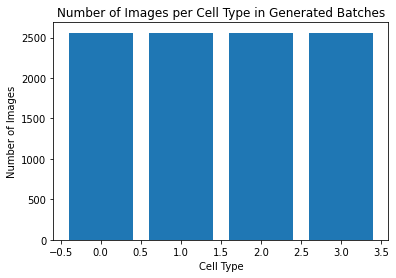

In [22]:
def visualise_celltype_distribution(balanced_gen, num_batches=10, batch_size=32):
    celltype_counts = {0: 0, 1: 0, 2: 0, 3: 0}

    for _ in range(num_batches):
        _, batch_y = next(balanced_gen)
        batch_y = np.argmax(batch_y, axis=1)
        unique, counts = np.unique(batch_y, return_counts=True)
        for u, c in zip(unique, counts):
            celltype_counts[u] += c

    plt.bar(celltype_counts.keys(), celltype_counts.values())
    plt.xlabel('Cell Type')
    plt.ylabel('Number of Images')
    plt.title('Number of Images per Cell Type in Generated Batches')
    plt.show()

visualise_celltype_distribution(balanced_gen)


In [23]:
INPUT_DIM = (27,27,3)
HIDDEN_LAYER1_DIM = 54
HIDDEN_LAYER2_DIM = 128
HIDDEN_LAYER3_DIM = 54
HIDDEN_LAYER4_DIM = 54
OUTPUT_CLASSES = 4
reg_lambda = 0.001
dropoutPercent = 0.3

In [24]:
task1_model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.InputLayer(input_shape=INPUT_DIM),
    tensorflow.keras.layers.Conv2D(HIDDEN_LAYER1_DIM,kernel_size=(3, 3), activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(reg_lambda)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(OUTPUT_CLASSES, kernel_regularizer=tensorflow.keras.regularizers.l2(reg_lambda))
])

task1_model.compile(optimizer='SGD',
              loss=tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True),
              metrics=['categorical_accuracy'])

In [25]:
def plot_learning_curve(train_loss, val_loss, train_metric, val_metric, metric_name='Accuracy'):
    plt.figure(figsize=(10,5))
    
    plt.subplot(1,2,1)
    plt.plot(train_loss, 'r--')
    plt.plot(val_loss, 'b--')
    plt.xlabel("epochs")
    plt.ylabel("Loss")
    plt.legend(['train', 'val'], loc='upper left')

    plt.subplot(1,2,2)
    plt.plot(train_metric, 'r--')
    plt.plot(val_metric, 'b--')
    plt.xlabel("epochs")
    plt.ylabel(metric_name)
    plt.legend(['train', 'val'], loc='upper left')

    plt.show()

In [26]:
total_train_images = len(task1_train_balanced)
total_val_images = len(task1_val)
steps_per_epoch = total_train_images // batch_size
validation_steps = total_val_images // batch_size

history = task1_model.fit(balanced_gen, validation_data=val_gen, epochs=50, verbose=1, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps)

Epoch 1/50
62/62 [==============================] - 41s 658ms/step - loss: 1.3786 - categorical_accuracy: 0.3609 - val_loss: 1.0898 - val_categorical_accuracy: 0.6945
Epoch 2/50
62/62 [==============================] - 33s 532ms/step - loss: 1.3033 - categorical_accuracy: 0.3587 - val_loss: 0.9768 - val_categorical_accuracy: 0.7375
Epoch 3/50
62/62 [==============================] - 32s 528ms/step - loss: 1.2682 - categorical_accuracy: 0.4026 - val_loss: 0.9194 - val_categorical_accuracy: 0.7520
Epoch 4/50
62/62 [==============================] - 32s 527ms/step - loss: 1.2374 - categorical_accuracy: 0.4320 - val_loss: 0.8487 - val_categorical_accuracy: 0.7477
Epoch 5/50
62/62 [==============================] - 32s 530ms/step - loss: 1.2134 - categorical_accuracy: 0.4460 - val_loss: 0.8102 - val_categorical_accuracy: 0.7586
Epoch 6/50
62/62 [==============================] - 33s 532ms/step - loss: 1.1905 - categorical_accuracy: 0.4587 - val_loss: 0.8040 - val_categorical_accuracy: 0.762

Epoch 50/50
62/62 [==============================] - 32s 530ms/step - loss: 0.9560 - categorical_accuracy: 0.5885 - val_loss: 0.9205 - val_categorical_accuracy: 0.6414


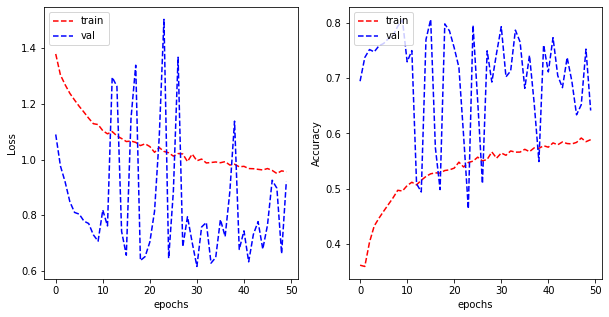

In [27]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [28]:
task1_model.save("base_task1_model")

INFO:tensorflow:Assets written to: base_task1_model\assets


In [29]:
base_model = tensorflow.keras.models.load_model('base_task1_model')

In [30]:
total_test_images = len(task1_test)
steps_per_epoch = total_test_images // batch_size
base_model.evaluate(test_gen, steps=steps_per_epoch)


12/12 [==============================] - 8s 687ms/step - loss: 0.7769 - categorical_accuracy: 0.7067


[0.7768701910972595, 0.7067057490348816]

In [31]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('base_task1_model.csv', index=False)

In [32]:
from keras_tuner import BayesianOptimization

def build_model(hp):
    model = tensorflow.keras.Sequential()
    model.add(tensorflow.keras.layers.InputLayer(input_shape=INPUT_DIM))
    input_shape = INPUT_DIM
    for i in range(hp.Int('num_hidden_layers', 1, 4)):
        if min(input_shape[:2]) <= 3:
            break
        model.add(keras.layers.Conv2D(
            filters=hp.Int(f'conv_{i}_units', min_value=32, max_value=256, step=32),
            kernel_size=(3, 3),
            activation='relu',
            kernel_regularizer=tensorflow.keras.regularizers.l2(hp.Float('reg_lambda', 1e-4, 1e-2, sampling='log'))
        ))
        if min(input_shape[:2]) > 2:
            model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(keras.layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.7, step=0.1)))
        input_shape = model.output_shape[1:3] + (model.output_shape[-1],)

    if min(input_shape[:2]) > 2:
        model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(tensorflow.keras.layers.Flatten())
    model.add(tensorflow.keras.layers.Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu'))
    
    model.add(tensorflow.keras.layers.Dense(OUTPUT_CLASSES,
                                    kernel_regularizer=tensorflow.keras.regularizers.l2(hp.Float('l2_reg', min_value=1e-4, max_value=1e-2, sampling='LOG'))))
    
    model.compile(
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss=tensorflow.keras.losses.CategoricalCrossentropy(from_logits=True),
        metrics=['categorical_accuracy']
    )
    
    return model

tuner = BayesianOptimization(
    build_model,
    objective='val_categorical_accuracy',
    max_trials=50,
    num_initial_points=3,
    seed=69,
    directory=r'D:\Documents\GitHub\MLA2',
    project_name='task1')


INFO:tensorflow:Reloading Tuner from D:\Documents\GitHub\MLA2\task1\tuner0.json


In [33]:
total_train_images = len(task1_train_balanced)
total_val_images = len(task1_val)
steps_per_epoch = total_train_images // batch_size
validation_steps = total_val_images // batch_size

early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
tuner.search(balanced_gen,
             validation_data=val_gen,
             steps_per_epoch=steps_per_epoch,
             validation_steps=validation_steps,
             epochs=50,
             verbose=1, callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters found:")
print(f"Number of hidden layers: {best_hyperparameters.get('num_hidden_layers')}")

for i in range(best_hyperparameters.get('num_hidden_layers')):
    try:
        print(f"Conv_{i} units: {best_hyperparameters.get(f'conv_{i}_units')}")
        print(f"Dropout_{i}: {best_hyperparameters.get(f'dropout_{i}')}")      
    except KeyError:
        break

print("Regularization lambda: ", best_hyperparameters.get('reg_lambda'))
print("L2 regularization: ", best_hyperparameters.get('l2_reg'))
print("Learning rate: ", best_hyperparameters.get('learning_rate'))
print("Dense units: ", best_hyperparameters.get('dense_units'))




history = best_model.fit(balanced_gen, validation_data=val_gen, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, epochs=50, verbose=1)

INFO:tensorflow:Oracle triggered exit
Best hyperparameters found:
Number of hidden layers: 4
Conv_0 units: 256
Dropout_0: 0.0
Conv_1 units: 256
Dropout_1: 0.6000000000000001
Conv_2 units: 256
Dropout_2: 0.0
Regularization lambda:  0.0001
L2 regularization:  0.0001
Learning rate:  0.01
Dense units:  256
Epoch 1/50
62/62 [==============================] - 92s 1s/step - loss: 1.1201 - categorical_accuracy: 0.5249 - val_loss: 0.7618 - val_categorical_accuracy: 0.8051
Epoch 2/50
62/62 [==============================] - 91s 1s/step - loss: 1.1143 - categorical_accuracy: 0.5309 - val_loss: 0.7345 - val_categorical_accuracy: 0.8086
Epoch 3/50
62/62 [==============================] - 91s 1s/step - loss: 1.0877 - categorical_accuracy: 0.5404 - val_loss: 0.7853 - val_categorical_accuracy: 0.7699
Epoch 4/50
62/62 [==============================] - 92s 1s/step - loss: 1.0888 - categorical_accuracy: 0.5403 - val_loss: 0.7070 - val_categorical_accuracy: 0.8066
Epoch 5/50
62/62 [======================

Epoch 49/50
62/62 [==============================] - 91s 1s/step - loss: 0.9256 - categorical_accuracy: 0.6192 - val_loss: 0.8051 - val_categorical_accuracy: 0.7012
Epoch 50/50
62/62 [==============================] - 91s 1s/step - loss: 0.9186 - categorical_accuracy: 0.6212 - val_loss: 0.8706 - val_categorical_accuracy: 0.6770


In [34]:
total_test_images = len(task1_test)
steps_per_epoch = total_test_images // batch_size
best_model.evaluate(test_gen, steps=steps_per_epoch)

12/12 [==============================] - 1s 101ms/step - loss: 0.7495 - categorical_accuracy: 0.7266


[0.7494533658027649, 0.7265625]

In [35]:
best_model.save("best_model_task1_50e")

INFO:tensorflow:Assets written to: best_model_task1_50e\assets


In [36]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('best_model_task1_50e.csv', index=False)

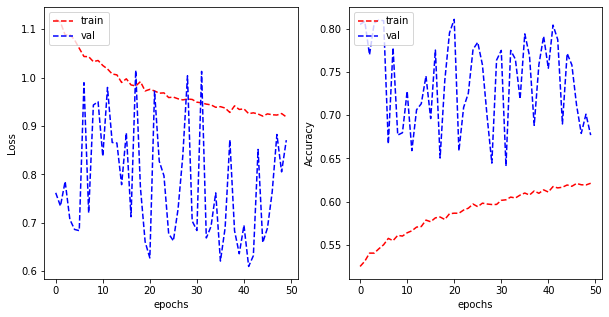

In [37]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

it seems even after hyperparameter tuning that the model is getting underfitted and this may just be due to the little training data that we have, however, I will try to get rid of the dropout layers and pooling layers from the best hyperparameters that we got from the tuning because I didn't input 0 dropout or have an option for 0 pooling layers. However, the training will take a long time to complete 

In [38]:
history = best_model.fit(balanced_gen, validation_data=val_gen, steps_per_epoch=steps_per_epoch, validation_steps=validation_steps, epochs=500, verbose=1)


Epoch 1/500
12/12 [==============================] - 18s 2s/step - loss: 0.9178 - categorical_accuracy: 0.6164 - val_loss: 0.6450 - val_categorical_accuracy: 0.7781
Epoch 2/500
12/12 [==============================] - 19s 2s/step - loss: 0.9273 - categorical_accuracy: 0.6174 - val_loss: 0.7407 - val_categorical_accuracy: 0.7230
Epoch 3/500
12/12 [==============================] - 18s 2s/step - loss: 0.9200 - categorical_accuracy: 0.6232 - val_loss: 0.7119 - val_categorical_accuracy: 0.7375
Epoch 4/500
12/12 [==============================] - 18s 2s/step - loss: 0.9109 - categorical_accuracy: 0.6256 - val_loss: 0.6817 - val_categorical_accuracy: 0.7578
Epoch 5/500
12/12 [==============================] - 18s 2s/step - loss: 0.9081 - categorical_accuracy: 0.6254 - val_loss: 0.6735 - val_categorical_accuracy: 0.7582
Epoch 6/500
12/12 [==============================] - 19s 2s/step - loss: 0.9069 - categorical_accuracy: 0.6216 - val_loss: 0.8358 - val_categorical_accuracy: 0.6883
Epoch 7/50

12/12 [==============================] - 18s 2s/step - loss: 0.8923 - categorical_accuracy: 0.6421 - val_loss: 0.7148 - val_categorical_accuracy: 0.7379
Epoch 100/500
12/12 [==============================] - 18s 2s/step - loss: 0.8982 - categorical_accuracy: 0.6301 - val_loss: 0.6018 - val_categorical_accuracy: 0.7828
Epoch 101/500
12/12 [==============================] - 18s 2s/step - loss: 0.9082 - categorical_accuracy: 0.6324 - val_loss: 0.7472 - val_categorical_accuracy: 0.7094
Epoch 102/500
12/12 [==============================] - 19s 2s/step - loss: 0.9137 - categorical_accuracy: 0.6216 - val_loss: 0.8851 - val_categorical_accuracy: 0.6680
Epoch 103/500
12/12 [==============================] - 18s 2s/step - loss: 0.8993 - categorical_accuracy: 0.6346 - val_loss: 0.6610 - val_categorical_accuracy: 0.7578
Epoch 104/500
12/12 [==============================] - 18s 2s/step - loss: 0.8974 - categorical_accuracy: 0.6328 - val_loss: 0.6598 - val_categorical_accuracy: 0.7660
Epoch 105/50

12/12 [==============================] - 18s 2s/step - loss: 0.8849 - categorical_accuracy: 0.6376 - val_loss: 0.6479 - val_categorical_accuracy: 0.7609
Epoch 198/500
12/12 [==============================] - 19s 2s/step - loss: 0.8834 - categorical_accuracy: 0.6414 - val_loss: 0.7737 - val_categorical_accuracy: 0.7012
Epoch 199/500
12/12 [==============================] - 18s 2s/step - loss: 0.8850 - categorical_accuracy: 0.6428 - val_loss: 0.7714 - val_categorical_accuracy: 0.7020
Epoch 200/500
12/12 [==============================] - 18s 2s/step - loss: 0.8939 - categorical_accuracy: 0.6372 - val_loss: 0.7993 - val_categorical_accuracy: 0.6941
Epoch 201/500
12/12 [==============================] - 18s 2s/step - loss: 0.8815 - categorical_accuracy: 0.6425 - val_loss: 0.7260 - val_categorical_accuracy: 0.7293
Epoch 202/500
12/12 [==============================] - 19s 2s/step - loss: 0.8831 - categorical_accuracy: 0.6440 - val_loss: 0.7049 - val_categorical_accuracy: 0.7293
Epoch 203/50

12/12 [==============================] - 18s 2s/step - loss: 0.8768 - categorical_accuracy: 0.6403 - val_loss: 0.6581 - val_categorical_accuracy: 0.7516
Epoch 296/500
12/12 [==============================] - 18s 2s/step - loss: 0.8849 - categorical_accuracy: 0.6436 - val_loss: 0.8285 - val_categorical_accuracy: 0.6730
Epoch 297/500
12/12 [==============================] - 18s 2s/step - loss: 0.8752 - categorical_accuracy: 0.6456 - val_loss: 0.7649 - val_categorical_accuracy: 0.7070
Epoch 298/500
12/12 [==============================] - 19s 2s/step - loss: 0.8728 - categorical_accuracy: 0.6457 - val_loss: 0.7901 - val_categorical_accuracy: 0.6879
Epoch 299/500
12/12 [==============================] - 18s 2s/step - loss: 0.8674 - categorical_accuracy: 0.6541 - val_loss: 0.7124 - val_categorical_accuracy: 0.7273
Epoch 300/500
12/12 [==============================] - 18s 2s/step - loss: 0.8693 - categorical_accuracy: 0.6505 - val_loss: 0.7140 - val_categorical_accuracy: 0.7234
Epoch 301/50

12/12 [==============================] - 19s 2s/step - loss: 0.8590 - categorical_accuracy: 0.6585 - val_loss: 0.6512 - val_categorical_accuracy: 0.7488
Epoch 394/500
12/12 [==============================] - 19s 2s/step - loss: 0.8645 - categorical_accuracy: 0.6510 - val_loss: 0.6258 - val_categorical_accuracy: 0.7613
Epoch 395/500
12/12 [==============================] - 18s 2s/step - loss: 0.8649 - categorical_accuracy: 0.6483 - val_loss: 0.7538 - val_categorical_accuracy: 0.7020
Epoch 396/500
12/12 [==============================] - 18s 2s/step - loss: 0.8642 - categorical_accuracy: 0.6544 - val_loss: 0.6985 - val_categorical_accuracy: 0.7344
Epoch 397/500
12/12 [==============================] - 19s 2s/step - loss: 0.8600 - categorical_accuracy: 0.6608 - val_loss: 0.6978 - val_categorical_accuracy: 0.7285
Epoch 398/500
12/12 [==============================] - 19s 2s/step - loss: 0.8613 - categorical_accuracy: 0.6561 - val_loss: 0.6935 - val_categorical_accuracy: 0.7309
Epoch 399/50

12/12 [==============================] - 19s 2s/step - loss: 0.8513 - categorical_accuracy: 0.6596 - val_loss: 0.6639 - val_categorical_accuracy: 0.7504
Epoch 492/500
12/12 [==============================] - 19s 2s/step - loss: 0.8603 - categorical_accuracy: 0.6551 - val_loss: 0.6812 - val_categorical_accuracy: 0.7422
Epoch 493/500
12/12 [==============================] - 19s 2s/step - loss: 0.8506 - categorical_accuracy: 0.6631 - val_loss: 0.6780 - val_categorical_accuracy: 0.7426
Epoch 494/500
12/12 [==============================] - 19s 2s/step - loss: 0.8565 - categorical_accuracy: 0.6568 - val_loss: 0.8180 - val_categorical_accuracy: 0.6660
Epoch 495/500
12/12 [==============================] - 19s 2s/step - loss: 0.8501 - categorical_accuracy: 0.6549 - val_loss: 0.6474 - val_categorical_accuracy: 0.7613
Epoch 496/500
12/12 [==============================] - 19s 2s/step - loss: 0.8506 - categorical_accuracy: 0.6591 - val_loss: 0.7582 - val_categorical_accuracy: 0.7043
Epoch 497/50

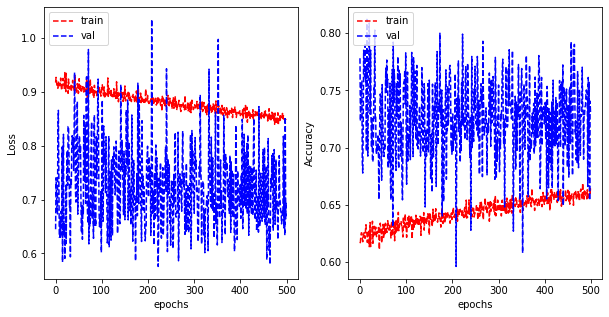

In [39]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['categorical_accuracy'], history.history['val_categorical_accuracy'], 
                    metric_name='Accuracy')

In [40]:
best_model.save("best_model_task1_500e")

INFO:tensorflow:Assets written to: best_model_task1_500e\assets


In [41]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('best_model_task1_500e.csv', index=False)

In [42]:
batch_size = 32
target_size = (27,27)

In [43]:
task2_train['isCancerous'] = task2_train['isCancerous'].astype(str)
task2_val['isCancerous'] = task2_val['isCancerous'].astype(str)
task2_test['isCancerous'] = task2_test['isCancerous'].astype(str)

In [44]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

augmentation_gen = ImageDataGenerator(
    rescale=1/255,
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

no_augmentation_gen = ImageDataGenerator(rescale=1/255)

train_generator = no_augmentation_gen.flow_from_dataframe(
    task2_train,
    directory='patch_images',
    x_col= "ImageName",
    y_col= "isCancerous",
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary'
)

val_generator = no_augmentation_gen.flow_from_dataframe(
    task2_val,
    directory='patch_images',
    x_col="ImageName",
    y_col="isCancerous",
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)

test_generator = no_augmentation_gen.flow_from_dataframe(
    task2_test,
    directory='patch_images',
    x_col="ImageName",
    y_col="isCancerous",
    target_size=target_size,
    batch_size=batch_size,
    class_mode='binary',
    shuffle=False
)


Found 11859 validated image filenames belonging to 2 classes.
Found 4694 validated image filenames belonging to 2 classes.
Found 3727 validated image filenames belonging to 2 classes.


In [45]:
INPUT_DIM = (27, 27, 3)
HIDDEN_LAYER1_DIM = 32
OUTPUT_CLASSES = 1
reg_lambda = 0.01


task2_model = tensorflow.keras.Sequential([
    tensorflow.keras.layers.InputLayer(input_shape=INPUT_DIM),
    tensorflow.keras.layers.Conv2D(HIDDEN_LAYER1_DIM, kernel_size=(3, 3), activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(reg_lambda)),
    tensorflow.keras.layers.Conv2D(HIDDEN_LAYER1_DIM, kernel_size=(3, 3), activation='relu', kernel_regularizer=tensorflow.keras.regularizers.l2(reg_lambda)),
    tensorflow.keras.layers.Flatten(),
    tensorflow.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid', kernel_regularizer=tensorflow.keras.regularizers.l2(reg_lambda))
])

task2_model.compile(optimizer='SGD',
              loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
              metrics=['binary_accuracy'])

In [46]:
history = task2_model.fit(train_generator, validation_data=val_generator, epochs=50, verbose=1)

Epoch 1/50
371/371 [==============================] - 28s 74ms/step - loss: 0.9038 - binary_accuracy: 0.7241 - val_loss: 0.7718 - val_binary_accuracy: 0.8259
Epoch 2/50
371/371 [==============================] - 7s 18ms/step - loss: 0.7372 - binary_accuracy: 0.8214 - val_loss: 0.7045 - val_binary_accuracy: 0.8179
Epoch 3/50
371/371 [==============================] - 7s 18ms/step - loss: 0.6731 - binary_accuracy: 0.8309 - val_loss: 0.6594 - val_binary_accuracy: 0.8326
Epoch 4/50
371/371 [==============================] - 6s 17ms/step - loss: 0.6195 - binary_accuracy: 0.8395 - val_loss: 0.6044 - val_binary_accuracy: 0.8436
Epoch 5/50
371/371 [==============================] - 6s 17ms/step - loss: 0.5825 - binary_accuracy: 0.8436 - val_loss: 0.5900 - val_binary_accuracy: 0.8257
Epoch 6/50
371/371 [==============================] - 6s 17ms/step - loss: 0.5500 - binary_accuracy: 0.8486 - val_loss: 0.5993 - val_binary_accuracy: 0.8110
Epoch 7/50
371/371 [==============================] - 7s 

In [47]:
task2_model.evaluate(test_generator)

117/117 [==============================] - 5s 41ms/step - loss: 0.4328 - binary_accuracy: 0.8237


[0.43284106254577637, 0.823718786239624]

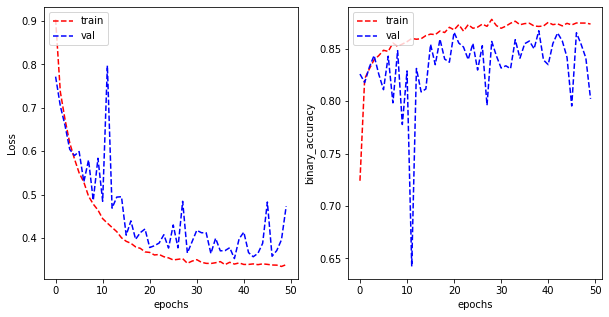

In [48]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['binary_accuracy'], history.history['val_binary_accuracy'], 
                    metric_name='binary_accuracy')

In [49]:
task2_model.evaluate(test_generator)

117/117 [==============================] - 1s 8ms/step - loss: 0.4328 - binary_accuracy: 0.8237


[0.43284106254577637, 0.823718786239624]

In [50]:
task2_model.save("base_model_task2")

INFO:tensorflow:Assets written to: base_model_task2\assets


In [51]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('base_model_task2.csv', index=False)

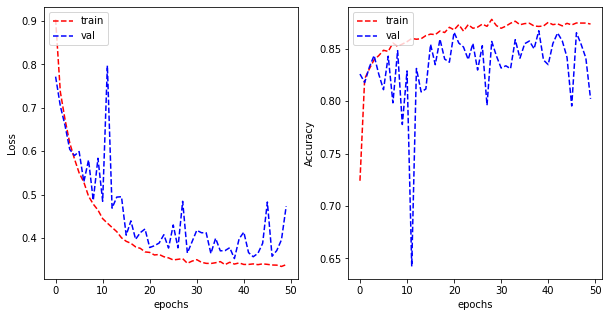

In [52]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['binary_accuracy'], history.history['val_binary_accuracy'], 
                    metric_name='Accuracy')

In [53]:
from keras_tuner import BayesianOptimization

def build_model2(hp):
    model = tensorflow.keras.Sequential()
    model.add(tensorflow.keras.layers.InputLayer(input_shape=INPUT_DIM))
    input_shape = INPUT_DIM
    for i in range(hp.Int('num_hidden_layers', 1, 4)):
        if min(input_shape[:2]) <= 3:
            break
        model.add(keras.layers.Conv2D(
            filters=hp.Int(f'conv_{i}_units', min_value=32, max_value=256, step=32),
            kernel_size=(3, 3),
            activation='relu',
            kernel_regularizer=tensorflow.keras.regularizers.l2(hp.Float('reg_lambda', 1e-4, 1e-2, sampling='log'))
        ))
        if min(input_shape[:2]) > 2:
            model.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
        model.add(keras.layers.Dropout(rate=hp.Float(f'dropout_{i}', 0.0, 0.7, step=0.1)))
        input_shape = model.output_shape[1:3] + (model.output_shape[-1],)

    if min(input_shape[:2]) > 2:
        model.add(tensorflow.keras.layers.MaxPooling2D(pool_size=(2, 2)))
    
    model.add(tensorflow.keras.layers.Flatten())
    model.add(tensorflow.keras.layers.Dense(hp.Int('dense_units', min_value=32, max_value=256, step=32), activation='relu'))
    
    model.add(tensorflow.keras.layers.Dense(OUTPUT_CLASSES, activation='sigmoid',
                                    kernel_regularizer=tensorflow.keras.regularizers.l2(hp.Float('l2_reg', min_value=1e-4, max_value=1e-2, sampling='LOG'))))
    
    model.compile(
        optimizer=tensorflow.keras.optimizers.SGD(learning_rate=hp.Float('learning_rate', 1e-4, 1e-2, sampling='log')),
        loss=tensorflow.keras.losses.BinaryCrossentropy(from_logits=False),
        metrics=['binary_accuracy']
    )
    
    return model

tuner = BayesianOptimization(
    build_model2,
    objective='val_binary_accuracy',
    max_trials=100,
    num_initial_points=3,
    seed=69,
    directory=r'D:\Documents\GitHub\MLA2',
    project_name='task2')

INFO:tensorflow:Reloading Tuner from D:\Documents\GitHub\MLA2\task2\tuner0.json


In [54]:
early_stopping = tensorflow.keras.callbacks.EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
tuner.search(train_generator,
             validation_data=val_generator,
             epochs=50,
             verbose=1, 
             callbacks=[early_stopping])

best_model = tuner.get_best_models(num_models=1)[0]
best_hyperparameters = tuner.get_best_hyperparameters(num_trials=1)[0]

print("Best hyperparameters found:")
print(f"Number of hidden layers: {best_hyperparameters.get('num_hidden_layers')}")

for i in range(best_hyperparameters.get('num_hidden_layers')):
    try:
        print(f"Conv_{i} units: {best_hyperparameters.get(f'conv_{i}_units')}")
        print(f"Dropout_{i}: {best_hyperparameters.get(f'dropout_{i}')}")      
    except KeyError:
        break

print("Regularization lambda: ", best_hyperparameters.get('reg_lambda'))
print("L2 regularization: ", best_hyperparameters.get('l2_reg'))
print("Learning rate: ", best_hyperparameters.get('learning_rate'))
print("Dense units: ", best_hyperparameters.get('dense_units'))


history = best_model.fit(train_generator, validation_data=val_generator, epochs=500, verbose=1)

INFO:tensorflow:Oracle triggered exit
Best hyperparameters found:
Number of hidden layers: 2
Conv_0 units: 96
Dropout_0: 0.0
Conv_1 units: 256
Dropout_1: 0.2
Regularization lambda:  0.0024779143461674323
L2 regularization:  0.00258383498395351
Learning rate:  0.01
Dense units:  32
Epoch 1/500
371/371 [==============================] - 10s 26ms/step - loss: 0.3824 - binary_accuracy: 0.8839 - val_loss: 0.4753 - val_binary_accuracy: 0.8319
Epoch 2/500
371/371 [==============================] - 9s 25ms/step - loss: 0.3754 - binary_accuracy: 0.8846 - val_loss: 0.4046 - val_binary_accuracy: 0.8692
Epoch 3/500
371/371 [==============================] - 9s 25ms/step - loss: 0.3730 - binary_accuracy: 0.8847 - val_loss: 0.4096 - val_binary_accuracy: 0.8679
Epoch 4/500
371/371 [==============================] - 9s 25ms/step - loss: 0.3750 - binary_accuracy: 0.8844 - val_loss: 0.4018 - val_binary_accuracy: 0.8724
Epoch 5/500
371/371 [==============================] - 9s 25ms/step - loss: 0.3706 - 

Epoch 51/500
371/371 [==============================] - 9s 25ms/step - loss: 0.3086 - binary_accuracy: 0.8914 - val_loss: 0.3749 - val_binary_accuracy: 0.8607
Epoch 52/500
371/371 [==============================] - 9s 25ms/step - loss: 0.3054 - binary_accuracy: 0.8934 - val_loss: 0.4919 - val_binary_accuracy: 0.7942
Epoch 53/500
371/371 [==============================] - 9s 25ms/step - loss: 0.3029 - binary_accuracy: 0.8965 - val_loss: 0.3472 - val_binary_accuracy: 0.8745
Epoch 54/500
371/371 [==============================] - 9s 26ms/step - loss: 0.3063 - binary_accuracy: 0.8961 - val_loss: 0.3555 - val_binary_accuracy: 0.8647
Epoch 55/500
371/371 [==============================] - 9s 25ms/step - loss: 0.3071 - binary_accuracy: 0.8933 - val_loss: 0.3458 - val_binary_accuracy: 0.8786
Epoch 56/500
371/371 [==============================] - 10s 26ms/step - loss: 0.3031 - binary_accuracy: 0.8948 - val_loss: 0.3764 - val_binary_accuracy: 0.8588
Epoch 57/500
371/371 [=======================

371/371 [==============================] - 9s 25ms/step - loss: 0.2726 - binary_accuracy: 0.9127 - val_loss: 0.3649 - val_binary_accuracy: 0.8675
Epoch 154/500
371/371 [==============================] - 10s 26ms/step - loss: 0.2682 - binary_accuracy: 0.9153 - val_loss: 0.3401 - val_binary_accuracy: 0.8813
Epoch 155/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2719 - binary_accuracy: 0.9133 - val_loss: 0.3399 - val_binary_accuracy: 0.8739
Epoch 156/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2681 - binary_accuracy: 0.9145 - val_loss: 0.3854 - val_binary_accuracy: 0.8558
Epoch 157/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2669 - binary_accuracy: 0.9149 - val_loss: 0.3456 - val_binary_accuracy: 0.8790
Epoch 158/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2674 - binary_accuracy: 0.9168 - val_loss: 0.3674 - val_binary_accuracy: 0.8651
Epoch 159/500
371/371 [==============================

371/371 [==============================] - 9s 25ms/step - loss: 0.2472 - binary_accuracy: 0.9311 - val_loss: 0.4318 - val_binary_accuracy: 0.8381
Epoch 256/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2458 - binary_accuracy: 0.9324 - val_loss: 0.3625 - val_binary_accuracy: 0.8784
Epoch 257/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2484 - binary_accuracy: 0.9332 - val_loss: 0.3510 - val_binary_accuracy: 0.8794
Epoch 258/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2496 - binary_accuracy: 0.9298 - val_loss: 0.3813 - val_binary_accuracy: 0.8671
Epoch 259/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2465 - binary_accuracy: 0.9330 - val_loss: 0.3566 - val_binary_accuracy: 0.8743
Epoch 260/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2538 - binary_accuracy: 0.9276 - val_loss: 0.3584 - val_binary_accuracy: 0.8735
Epoch 261/500
371/371 [==============================]

371/371 [==============================] - 9s 25ms/step - loss: 0.2260 - binary_accuracy: 0.9505 - val_loss: 0.4118 - val_binary_accuracy: 0.8647
Epoch 358/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2327 - binary_accuracy: 0.9464 - val_loss: 0.3848 - val_binary_accuracy: 0.8756
Epoch 359/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2331 - binary_accuracy: 0.9476 - val_loss: 0.3786 - val_binary_accuracy: 0.8811
Epoch 360/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2242 - binary_accuracy: 0.9524 - val_loss: 0.4125 - val_binary_accuracy: 0.8575
Epoch 361/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2226 - binary_accuracy: 0.9529 - val_loss: 0.4521 - val_binary_accuracy: 0.8426
Epoch 362/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2249 - binary_accuracy: 0.9519 - val_loss: 0.4433 - val_binary_accuracy: 0.8458
Epoch 363/500
371/371 [==============================]

371/371 [==============================] - 9s 25ms/step - loss: 0.1992 - binary_accuracy: 0.9690 - val_loss: 0.4089 - val_binary_accuracy: 0.8671
Epoch 460/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2077 - binary_accuracy: 0.9642 - val_loss: 0.4507 - val_binary_accuracy: 0.8483
Epoch 461/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2053 - binary_accuracy: 0.9658 - val_loss: 0.4137 - val_binary_accuracy: 0.8662
Epoch 462/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2037 - binary_accuracy: 0.9673 - val_loss: 0.4358 - val_binary_accuracy: 0.8617
Epoch 463/500
371/371 [==============================] - 9s 25ms/step - loss: 0.2025 - binary_accuracy: 0.9675 - val_loss: 0.4155 - val_binary_accuracy: 0.8673
Epoch 464/500
371/371 [==============================] - 9s 25ms/step - loss: 0.1986 - binary_accuracy: 0.9696 - val_loss: 0.4377 - val_binary_accuracy: 0.8558
Epoch 465/500
371/371 [==============================]

In [55]:
best_model.evaluate(test_generator)

117/117 [==============================] - 10s 86ms/step - loss: 0.5073 - binary_accuracy: 0.8610


[0.5073055624961853, 0.8610142469406128]

In [56]:
best_model.save("best_model_task2")

INFO:tensorflow:Assets written to: best_model_task2\assets


In [57]:
history_df = pd.DataFrame(history.history)
history_df.to_csv('best_model_task2.csv', index=False)

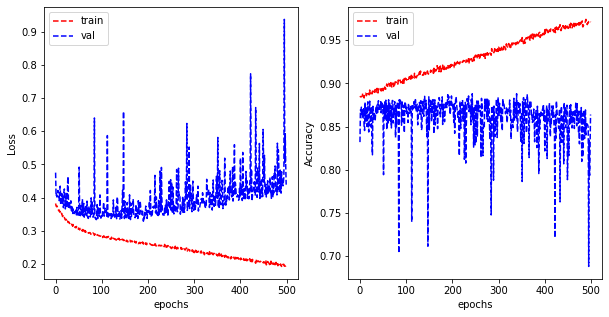

In [58]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['binary_accuracy'], history.history['val_binary_accuracy'], 
                    metric_name='Accuracy')

In [59]:
history = best_model.fit(train_generator, validation_data=val_generator, epochs=200, verbose=1)

Epoch 1/200
371/371 [==============================] - 9s 25ms/step - loss: 0.2009 - binary_accuracy: 0.9687 - val_loss: 0.4270 - val_binary_accuracy: 0.8656
Epoch 2/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1982 - binary_accuracy: 0.9701 - val_loss: 0.4114 - val_binary_accuracy: 0.8730
Epoch 3/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1952 - binary_accuracy: 0.9727 - val_loss: 0.5376 - val_binary_accuracy: 0.8147
Epoch 4/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1900 - binary_accuracy: 0.9732 - val_loss: 0.4196 - val_binary_accuracy: 0.8690
Epoch 5/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1955 - binary_accuracy: 0.9705 - val_loss: 0.4378 - val_binary_accuracy: 0.8651
Epoch 6/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1947 - binary_accuracy: 0.9724 - val_loss: 0.4806 - val_binary_accuracy: 0.8411
Epoch 7/200
371/371 [==============================]

371/371 [==============================] - 9s 25ms/step - loss: 0.1791 - binary_accuracy: 0.9797 - val_loss: 0.6201 - val_binary_accuracy: 0.7904
Epoch 104/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1816 - binary_accuracy: 0.9779 - val_loss: 0.5163 - val_binary_accuracy: 0.8300
Epoch 105/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1872 - binary_accuracy: 0.9750 - val_loss: 0.4825 - val_binary_accuracy: 0.8419
Epoch 106/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1879 - binary_accuracy: 0.9760 - val_loss: 0.4312 - val_binary_accuracy: 0.8649
Epoch 107/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1883 - binary_accuracy: 0.9752 - val_loss: 0.4263 - val_binary_accuracy: 0.8632
Epoch 108/200
371/371 [==============================] - 9s 25ms/step - loss: 0.1819 - binary_accuracy: 0.9773 - val_loss: 0.4382 - val_binary_accuracy: 0.8692
Epoch 109/200
371/371 [==============================]

In [60]:
best_model.save("best_model_task2500e")

INFO:tensorflow:Assets written to: best_model_task2500e\assets


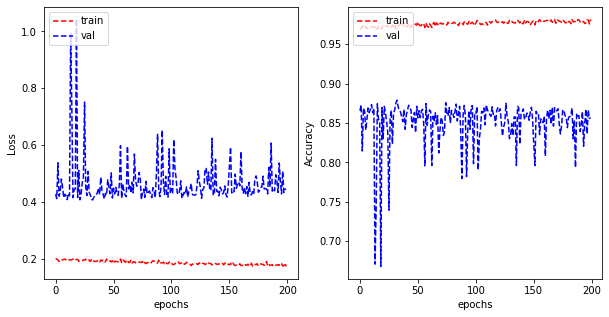

In [61]:
plot_learning_curve(history.history['loss'], history.history['val_loss'], 
                    history.history['binary_accuracy'], history.history['val_binary_accuracy'], 
                    metric_name='Accuracy')

history_df = pd.DataFrame(history.history)
history_df.to_csv('best_model_task2.csv', index=False)

In [62]:
best_model.evaluate(test_generator)

117/117 [==============================] - 1s 9ms/step - loss: 0.4743 - binary_accuracy: 0.8575


[0.47428810596466064, 0.8575261831283569]

In [ ]:
+


+++++++++
+++